# The Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


Predicting the price of a new gemstone based on feature1 and feature2. We can measure its features and predict what price we should be selling this at the market due to the fact that we have historical information on the price sold based of these two features

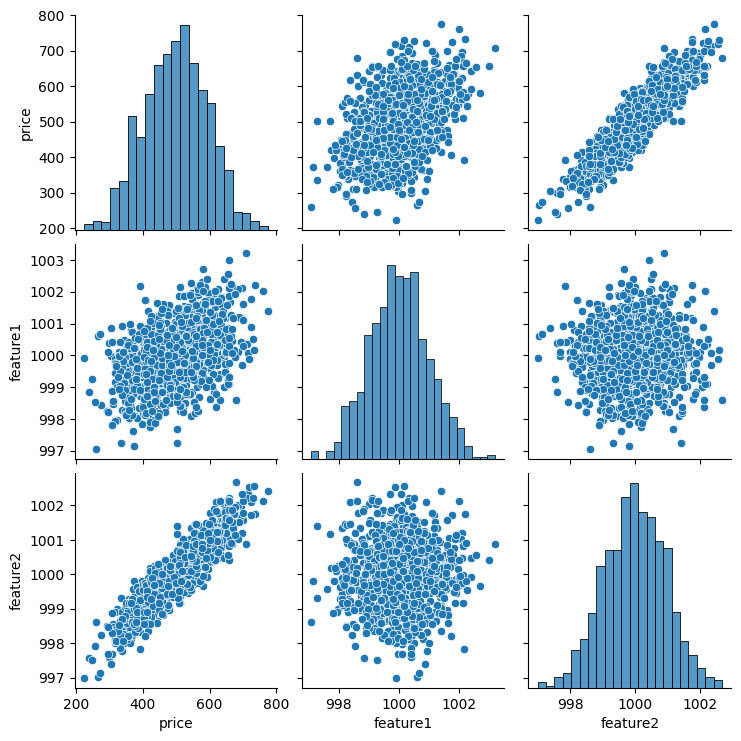

In [4]:
sns.pairplot(df)

# Test/Train Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['feature1', 'feature2']].values # Converting Pandas to Numpy for Keras (.values part)

In [7]:
y = df['price'].values # Converting Pandas to Numpy for Keras (.values part)

In [8]:
X # Features

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [9]:
y # Label

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
X_train.shape

(700, 2)

In [12]:
X_test.shape

(300, 2)

In [13]:
y_train.shape

(700,)

In [14]:
y_test.shape

(300,)

# Normalizing/Scaling the Data

Normalization adjusts the data to a common scale, often within [0, 1] or [-1, 1], using the minimum and maximum values of each feature.
Standardization transforms the data to have a mean of 0 and a standard deviation of 1.
These techniques are essential for the performance of many machine learning and deep learning algorithms, particularly those sensitive to feature scales.

In [15]:
# Normalizing/Scaling the data
from sklearn.preprocessing import MinMaxScaler

In [16]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bo

In [17]:
# We only need to scale the features since that's essential what's being passed through the acutal network
scaler = MinMaxScaler() # Creating an instance of our MinMaxScaler

To prevent data leakage from the test set, we only fit our scaler to the training set

In [19]:
scaler.fit(X_train) # What fit does is it essentially calculates the standard deviation, the min and max
# We only fit our scaler to the training set to not try to cheat and look into the test set

MinMaxScaler()

In [20]:
X_train = scaler.transform(X_train) # firstly we fit which is calculate what's needed for the transformation to occur and then we actually perform the transformation

In [21]:
X_test = scaler.transform(X_test)

In [22]:
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [23]:
X_train.max() # S everyhting's been scaled to be between 0 and 1

1.0

In [24]:
X_train.min()

0.0

# Creating a Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
help(Sequential)

Help on class Sequential in module keras.src.engine.sequential:

class Sequential(keras.src.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the initial `Input`.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8))
 |  model.add(tf.keras.layers.Dense(4))
 |  # model.weights not created yet
 |  
 |  # Whereas if you specify an `Input`, the model gets built
 |  # continuously as you are adding layers:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(s

Adding in layers one by one

In [29]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1)) # final layer has only dense 1 because it's just going to try to predict the price. So the final output is going to be measured against the true price. We'll do that with loss function
model.compile(optimizer='rmsprop', loss ='mse')

### Choosing an optimizer and loss

What kind of problem we are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [ ]:
# Antoher way. As a list of layers
model = Sequential([Dense(4, activation='relu'),
                    Dense(2, activation='relu'),
                    Dense(1)])

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [30]:
model.fit(x=X_train, y=y_train, epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 4ms/step - loss: 256709.1406
Epoch 2/250
22/22 [==============================] - 0s 3ms/step - loss: 256624.6562
Epoch 3/250
22/22 [==============================] - 0s 3ms/step - loss: 256545.4688
Epoch 4/250
22/22 [==============================] - 0s 3ms/step - loss: 256455.4531
Epoch 5/250
22/22 [==============================] - 0s 3ms/step - loss: 256353.8906
Epoch 6/250
22/22 [==============================] - 0s 4ms/step - loss: 256240.3438
Epoch 7/250
22/22 [==============================] - 0s 3ms/step - loss: 256113.5938
Epoch 8/250
22/22 [==============================] - 0s 3ms/step - loss: 255971.7188
Epoch 9/250
22/22 [==============================] - 0s 3ms/step - loss: 255811.9375
Epoch 10/250
22/22 [==============================] - 0s 3ms/step - loss: 255629.3750
Epoch 11/250
22/22 [==============================] - 0s 3ms/step - loss: 255423.3438
Epoch 12/250
22/22 [==============================] - 0s 3ms/st

# Evaluation

In [31]:
model.history.history

{'loss': [256709.140625,
  256624.65625,
  256545.46875,
  256455.453125,
  256353.890625,
  256240.34375,
  256113.59375,
  255971.71875,
  255811.9375,
  255629.375,
  255423.34375,
  255193.046875,
  254933.671875,
  254647.265625,
  254328.75,
  253975.46875,
  253587.6875,
  253160.796875,
  252693.671875,
  252182.125,
  251629.734375,
  251027.796875,
  250375.703125,
  249673.140625,
  248907.546875,
  248090.96875,
  247211.390625,
  246268.34375,
  245264.25,
  244191.125,
  243046.015625,
  241814.859375,
  240511.765625,
  239137.78125,
  237677.828125,
  236134.765625,
  234502.1875,
  232783.8125,
  230967.890625,
  229049.078125,
  227041.53125,
  224934.5625,
  222733.578125,
  220415.765625,
  217989.34375,
  215470.578125,
  212836.890625,
  210084.34375,
  207218.265625,
  204237.59375,
  201139.796875,
  197937.6875,
  194618.015625,
  191172.53125,
  187609.421875,
  183929.546875,
  180142.578125,
  176234.5625,
  172209.0,
  168072.265625,
  163812.78125,
  15946

In [32]:
loss_df = pd.DataFrame(model.history.history)

In [33]:
loss_df

,loss
0,256709.140625
1,256624.656250
2,256545.468750
3,256455.453125
4,256353.890625
...,...
245,24.407463
246,24.473864
247,24.249529
248,24.757204


<Axes: >

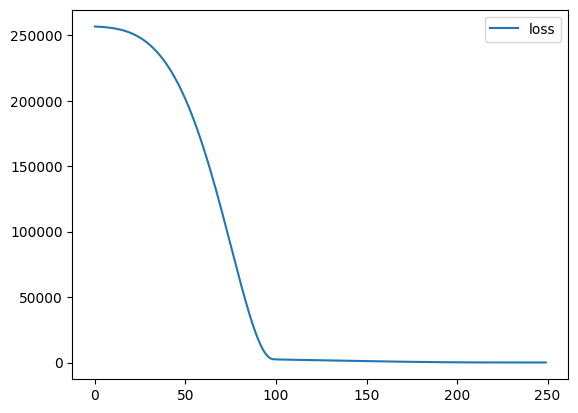

In [34]:
loss_df.plot()

In [36]:
model.evaluate(X_test,y_test, verbose=0) # On the test set (the data never seen before) its getting back a mean squared error of 26.54

26.543611526489258

In [38]:
model.evaluate(X_train,y_train, verbose=0)

24.402076721191406

# Further Evaluations

In [60]:
test_predictions = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [61]:
test_predictions

array([[406.37842],
       [624.71484],
       [593.2382 ],
       [573.50977],
       [367.93616],
       [580.37366],
       [516.42426],
       [460.1211 ],
       [550.5152 ],
       [448.50922],
       [612.9504 ],
       [549.8476 ],
       [420.21277],
       [410.0175 ],
       [652.17163],
       [438.33148],
       [509.37836],
       [661.33185],
       [663.8647 ],
       [566.59186],
       [335.41473],
       [445.9536 ],
       [383.6995 ],
       [379.82233],
       [567.7653 ],
       [611.8915 ],
       [533.56665],
       [428.9349 ],
       [656.77814],
       [415.07745],
       [443.6451 ],
       [486.24762],
       [439.49802],
       [683.15875],
       [425.69385],
       [418.88416],
       [502.79175],
       [551.6016 ],
       [511.05362],
       [396.676  ],
       [619.71075],
       [417.65002],
       [605.5724 ],
       [446.8908 ],
       [503.12115],
       [582.6071 ],
       [669.997  ],
       [491.4298 ],
       [319.52197],
       [486.57166],


In [62]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [63]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [64]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [65]:
test_predictions

0      406.378418
1      624.714844
2      593.238220
3      573.509766
4      367.936157
          ...    
295    530.292603
296    516.865723
297    610.793396
298    417.932617
299    412.060974
Length: 300, dtype: float32

In [66]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [69]:
pred_df.columns = ['Test True Y','Model Predictions']

In [70]:
pred_df

,Test True Y,Model Predictions
0,402.296319,406.378418
1,624.156198,624.714844
2,582.455066,593.238220
3,578.588606,573.509766
4,371.224104,367.936157
...,...,...
295,525.704657,530.292603
296,502.909473,516.865723
297,612.727910,610.793396
298,417.569725,417.932617


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

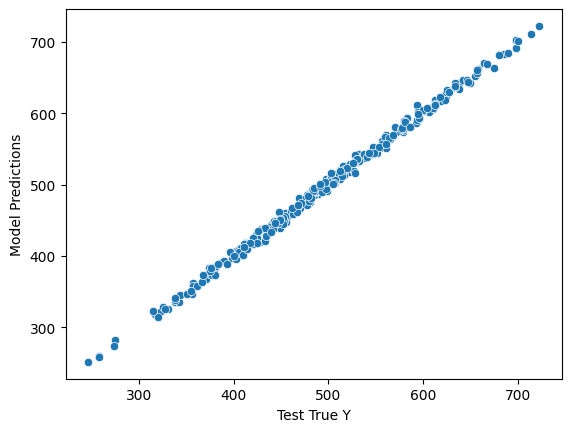

In [71]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [73]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

4.179331163549535

In [74]:
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


In [76]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [78]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

26.543613594446732

In [79]:
#RMSE
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])**0.5

5.152049455745425

# Predicting on Brand New Data

In [80]:
new_gem = [[998,1000]] # Made up features

In [81]:
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [82]:
new_gem = scaler.transform(new_gem)

In [83]:
model.predict(new_gem)

1/1 [==============================] - 0s 22ms/step


array([[421.00983]], dtype=float32)

# Saving and Loading the Model

In [84]:
from tensorflow.keras.models import load_model

In [85]:
model.save('gem_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [86]:
later_model = load_model('gem_model.h5')

In [87]:
later_model.predict(new_gem)

1/1 [==============================] - 0s 70ms/step


array([[421.00983]], dtype=float32)